## **AN INTRODUCTION TO PRETRAINED MODELS AND TRANSFER LEARNING**

- **Machine Learning**: Teaching computers to learn from data and make decisions without being explicitly programmed.
- **Deep Learning**: A subset of machine learning using neural networks with many layers to learn from vast amounts of data.

#### What are Pretrained Models?
- **Pretrained Models**: Neural networks trained on large datasets (like ImageNet) that can be used for similar tasks.
- **Benefits**: Saves time and resources, improves performance on small datasets, leverages knowledge from extensive datasets.

#### Introduction to Transfer Learning
- **Transfer Learning**: Using a pretrained model on a new, similar task. Think of it as transferring knowledge from one task to another.
- **Types of Transfer Learning**:
  - **Feature Extraction**: Using the pretrained model’s layers to extract features and then training a new classifier on top.
  - **Fine-Tuning**: Training some or all layers of the pretrained model on new data to tweak the model for the new task.

### Project: Image Classification With Transfer Learning

We'll use a pretrained model to classify images of cats and dogs

In [1]:
# Install necessary libraries
!pip install tensorflow keras numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [2]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16 # pretrained model for image classification
from tensorflow.keras.models import Model # model method for creating a model( we extend the already trained model by adding our own layers)
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# for base 64 images used for prediction
import base64
from io import BytesIO
from PIL import Image

2024-07-28 09:36:37.657529: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 09:36:37.657647: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 09:36:37.783666: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Load and Preprocess Data**

**ImageDataGenerator**: Helps in loading images and applying real-time data augmentation.

In [3]:
# Define directories for your dataset (assuming dataset is in 'input' directory on Kaggle)
train_dir = '../input/cat-and-dog/training_set/training_set'
validation_dir = '../input/cat-and-dog/test_set/test_set'


In [4]:
# inspecting the dataset
import os

# List the contents of the base dataset directory
base_dir = '../input/cat-and-dog'
print('Contents of the base directory:')
print(os.listdir(base_dir))

# List the contents of the training and validation directories
print('\nContents of the training_set directory:')
print(os.listdir(os.path.join(base_dir, 'training_set')))

print('\nContents of the test_set directory:')
print(os.listdir(os.path.join(base_dir, 'test_set')))


Contents of the base directory:
['test_set', 'training_set']

Contents of the training_set directory:
['training_set']

Contents of the test_set directory:
['test_set']


In [5]:
# inspecting the dataset
import os

base_dir = '../input/cat-and-dog' 

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# List the number of images in each directory
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total training dog images:', len(os.listdir(train_dogs_dir)))
print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))

Total training cat images: 4001
Total training dog images: 4006
Total validation cat images: 1012
Total validation dog images: 1013


Create data generators for training and validation.

In [6]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the image pixels
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20%
    height_shift_range=0.2,  # Shift images vertically by up to 20%
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zoom in or out by up to 20%
    horizontal_flip=True  # Flip images horizontally
)

validation_datagen = ImageDataGenerator(rescale=1./255)



### Why data augmentation and preprocessing. What does the code hitherto mean?

Data augmentation is the process of **artificially generating new data** from existing data, primarily to train new machine learning (ML) models.

1. **`train_datagen = ImageDataGenerator(`**:
   - This line initializes an `ImageDataGenerator` instance for the training dataset. `ImageDataGenerator` is used to generate batches of tensor image data with real-time data augmentation.


2. **`rescale=1./255`**:
   - **Explanation**: This normalizes the image pixel values by scaling them down from the range [0, 255] to [0, 1]. Each pixel value is divided by 255.
   - **Why**: Normalization is essential because it helps the neural network to converge faster and achieve better performance by ensuring that the input data has a uniform scale.


3. **`rotation_range=20`**:
   - **Explanation**: This randomly rotates the images by up to 20 degrees.
   - **Why**: Rotation augmentation helps the model become invariant to the orientation of the objects in the image. This means the model can recognize the object regardless of its rotation.


4. **`width_shift_range=0.2`**:
   - **Explanation**: This shifts the images horizontally (left or right) by up to 20% of the image width.
   - **Why**: Horizontal shifting helps the model learn to recognize objects even if they are not centered in the image, making the model more robust to variations in object placement.
   

5. **`height_shift_range=0.2`**:
   - **Explanation**: This shifts the images vertically (up or down) by up to 20% of the image height.
   - **Why**: Vertical shifting, like horizontal shifting, helps the model become robust to variations in object placement.


6. **`shear_range=0.2`**:
   - **Explanation**: This applies a shear transformation to the images, which means the images are slanted or skewed.
   - **Why**: Shear transformation can help the model recognize objects even if they appear tilted or deformed, improving its generalization ability.


7. **`zoom_range=0.2`**:
   - **Explanation**: This zooms in or out on the images by up to 20%.
   - **Why**: Zoom augmentation helps the model recognize objects at different scales, making the model more robust to size variations.


8. **`horizontal_flip=True`**:
   - **Explanation**: This randomly flips the images horizontally.
   - **Why**: Horizontal flipping helps the model recognize objects regardless of their left-right orientation, which is useful for objects that can appear in either direction (e.g., animals facing left or right).
   

9. **`validation_datagen = ImageDataGenerator(rescale=1./255)`**:
   - **Explanation**: This initializes an `ImageDataGenerator` instance for the validation dataset with only normalization.
   - **Why**: For the validation dataset, we typically do not apply data augmentation because we want to evaluate the model on unaltered data. Normalization is still applied to ensure that the input scale matches that of the training data.

- **Training Data Augmentation**: The various transformations (rotation, shift, shear, zoom, flip) help create a more diverse set of training images. This prevents overfitting and improves the model's ability to generalize to new, unseen images.
- **Normalization**: Ensures that the pixel values are on a uniform scale, which is crucial for the convergence and performance of the neural network.
- **Validation Data**: Only normalized, not augmented, to provide a realistic evaluation of the model's performance on new, unaltertered data.

In [7]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Binary classification (cat or dog)
)

Found 8005 images belonging to 2 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,  # The path to the directory containing the validation images.
    target_size=(150, 150), # Resize all images to 150x150 pixels.
    batch_size=32,# Number of images to return in each batch.
    class_mode='binary'  # Type of classification. 'binary' indicates binary classification (cats vs dogs).
)

Found 2023 images belonging to 2 classes.


**Load the Pretrained Model**

**VGG16**: A popular pretrained model for image classification.

In [9]:
# Load the VGG16 model without the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model layers to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


**Build and Compile the Model**

**Custom Layers**: Add our own layers on top of the pretrained base.

In [10]:
# Add custom layers on top of the pretrained model
x = base_model.output
x = Flatten()(x)  # Flatten the output of the convolutional base. Prepares data for the fully connected layer

x = Dense(512, activation='relu')(x)  # Add a fully connected layer with 512 units and ReLU activation
predictions = Dense(1, activation='sigmoid')(x)  # Output layer with a single unit (binary classification) and sigmoid activation

# Combine the base model and the custom layers into a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and binary cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Why Flatten the output of conv layers

**Transition to Dense Layers:**

The output of the convolutional layers is typically a **3D tensor (height, width, depth)** which contains spatial information extracted by the convolutional filters.
**Dense** (fully connected) layers, however, require 1D input (a flat vector). Flattening transforms the 3D tensor into a 1D vector, making it suitable for input to the dense layers.


**Connecting Local Features to Global Information:**

Convolutional layers are excellent at detecting **local features** like edges, textures, and patterns.
Flattening followed by dense layers helps in combining these local features into **global information**, enabling the network to make final predictions based on the entire image.


**Preserving Feature Maps:**

When you flatten the feature maps (output of the convolutional base), you preserve all the information learned by the convolutional filters.
Each neuron in the first dense layer receives input from all the feature maps, allowing it to consider a combination of features for making predictions.

### Structure of a simple CNN
**Convolutional Layers:**

-  Extract spatial features and detect patterns like edges, textures, etc.


**Pooling Layers:**

- Reduce dimensionality and preserve important spatial features.


**Fully Connected Layers:**

- Flatten the feature maps and transform them into a single feature vector.
- Apply weights and biases to capture non-linear relationships.
- Aggregate features for final classification.

**Train the Model**

In [11]:
# Train the model using the training data generator
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # epoch here is a complete iteration through the dataset. 
    #  No of epochs determine number of iterations through the dataset
    # We put the data in batches so epoch will the no of times the model goes through each batch
    
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Train for 10 epochs( run the batches 10 times each)
)

Epoch 1/10


I0000 00:00:1722159424.888226      93 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 [==============================] - 104s 386ms/step - loss: 0.4421 - accuracy: 0.8091 - val_loss: 0.2958 - val_accuracy: 0.8705
Epoch 2/10
250/250 [==============================] - 59s 236ms/step - loss: 0.3314 - accuracy: 0.8510 - val_loss: 0.2733 - val_accuracy: 0.8805
Epoch 3/10
250/250 [==============================] - 59s 237ms/step - loss: 0.3145 - accuracy: 0.8595 - val_loss: 0.2713 - val_accuracy: 0.8834
Epoch 4/10
250/250 [==============================] - 58s 233ms/step - loss: 0.2927 - accuracy: 0.8707 - val_loss: 0.2345 - val_accuracy: 0.8968
Epoch 5/10
250/250 [==============================] - 59s 234ms/step - loss: 0.2801 - accuracy: 0.8765 - val_loss: 0.2477 - val_accuracy: 0.8914
Epoch 6/10
250/250 [==============================] - 58s 233ms/step - loss: 0.2752 - accuracy: 0.8811 - val_loss: 0.2333 - val_accuracy: 0.9008
Epoch 7/10
250/250 [==============================] - 61s 242ms/step - loss: 0.2695 - accuracy: 0.8792 - val_loss: 0.2221 - val_accuracy: 0.

**Evaluate the Model**

**Plot Training History**: Visualize accuracy and loss over epochs.

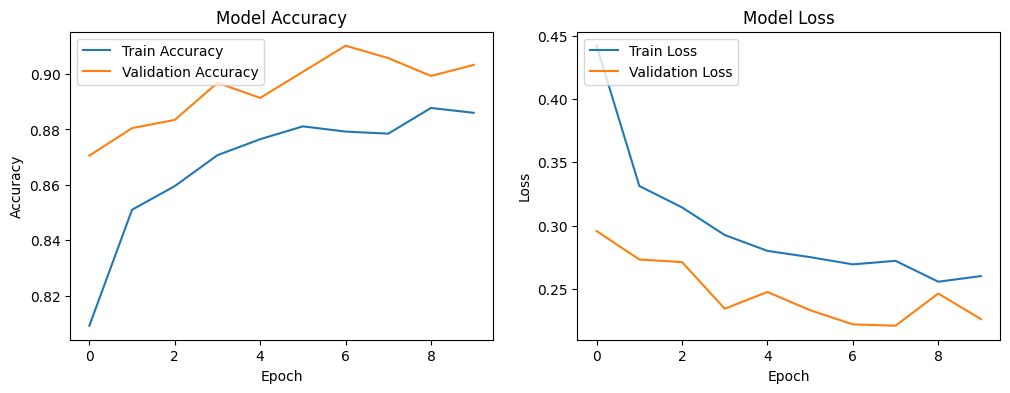

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

 **Make Predictions**
 
**Test on New Images**: See how well the model performs on new data.

In [13]:
# Load and preprocess a new image for prediction
img_path = '/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1004.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.

# Make a prediction
prediction = model.predict(img_array)
print('Prediction:', 'Dog' if prediction[0][0] > 0.5 else 'Cat')

1/1 [==============================] - 1s 1s/step
Prediction: Cat


We've built an image classifier using a pretrained model and transfer learning. This method allows us to achieve high accuracy even with a small dataset by leveraging the knowledge from a model trained on a large dataset.